In [1]:
import pickle as pkl
import numpy as np
import pandas
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# os.chdir("../../../Desktop/GDrive/opto_data")
os.chdir("D://gdrive/opto_data")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D://gdrive/opto_data'

In [ ]:
# data = pkl.load(open("processed_optodata_25may20.pkl", "rb"))
data = pkl.load(open("final/20sec_processed_optodata_24sep20.pkl", "rb"))

# cdata = pkl.load(open("processed_control_optodata_25may20.pkl", "rb"))

In [10]:
data["theta"].columns

Index(['Initial_coh', 'Distance', 'Coh_proj', 'Phase', 'Pair_avg_net_coh',
       'Elec_cov', 'Time_cov', 'Avg_coh_to_stim', 'Monkeys', 'Block_num',
       'Delays', 'Both_M1', 'Both_S1', 'Las1_distance_to_closer',
       'Las1_distance_to_further', 'Las2_distance_to_closer',
       'Las2_distance_to_further', 'Coh_diff_mag', 'End_diff', 'cond_diff_Y',
       'diff_Y'],
      dtype='object')

In [4]:
for band in data.keys():
    data[band]["Avg_diff_12_stim"] = data[band]["Avg_diff_1-2_stim"]

In [5]:
# Get only stim-site data
local_data = {}
for band in data.keys():
    local_data[band] = data[band][(data[band]["Is_stim_site_1"] == 1) & (data[band]["Is_stim_site_2"] == 1)]

In [6]:
first_data = {}
first_cdata = {}
first_local_data = {}

for band in data.keys():
    first_data[band] = data[band][data[band]["Block_num"] == 1]
    first_cdata[band] = cdata[band][cdata[band]["Block_num"] == 1]
    first_local_data[band] = local_data[band][local_data[band]["Block_num"] == 1]

## Look at feature distributions

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
first_data[band].columns

Index(['Initial_coh', 'Distance', 'Coh_proj', 'Coh_proj_sd', 'Phase',
       'From_electrodes', 'To_electrodes', 'Initial_coh_sd', 'Coh_diff_sd',
       'Coh_diff_avg', 'Pair_avg_net_coh', 'Pair_avg_net_coh_sd',
       'Graph_avg_net_coh', 'Graph_avg_net_coh_sd', 'Elec_cov', 'Time_cov',
       'Avg_coh_to_stim', 'Avg_diff_1-2_stim', 'Avg_stim_diff_btw_elec',
       'End_diff', 'Delays', 'Monkeys', 'Block_num', 'Experiment_block_key',
       'Both_M1', 'Both_S1', 'cond_diff_Y', 'cond_diff_percent_Y', 'diff_Y',
       'diff_percent_Y', 'Is_stim_site_1', 'Is_stim_site_2',
       'Las1_distance_to_closer', 'Las1_distance_to_further',
       'Las2_distance_to_closer', 'Las2_distance_to_further',
       'Avg_diff_12_stim'],
      dtype='object')

/home/julien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


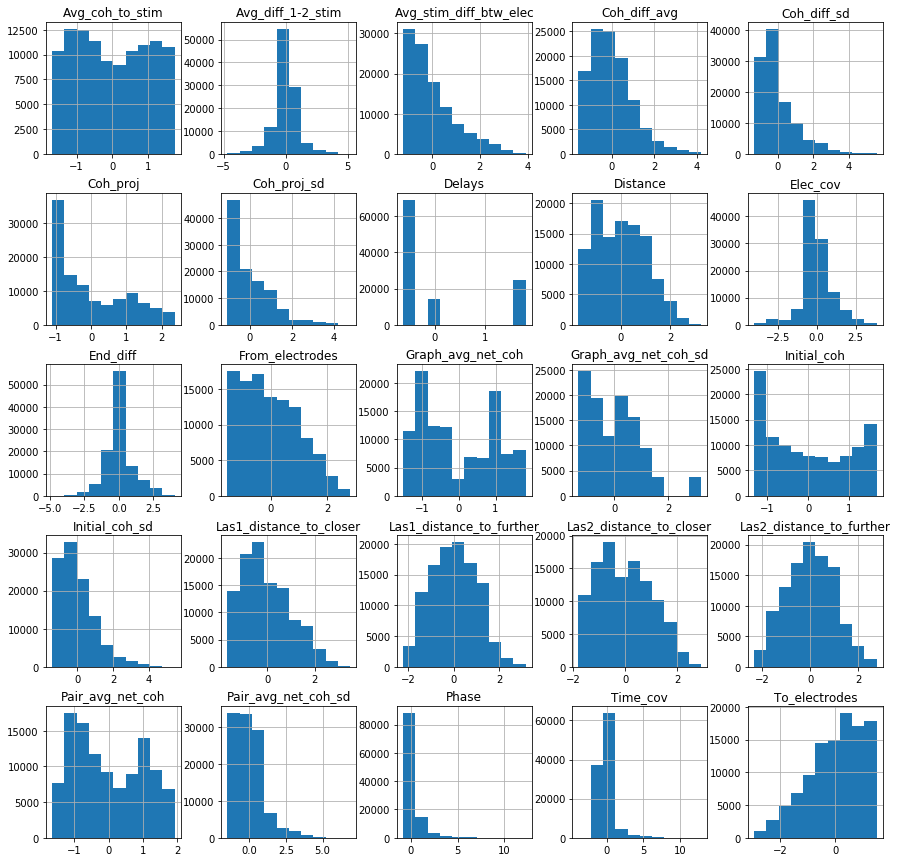

/home/julien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


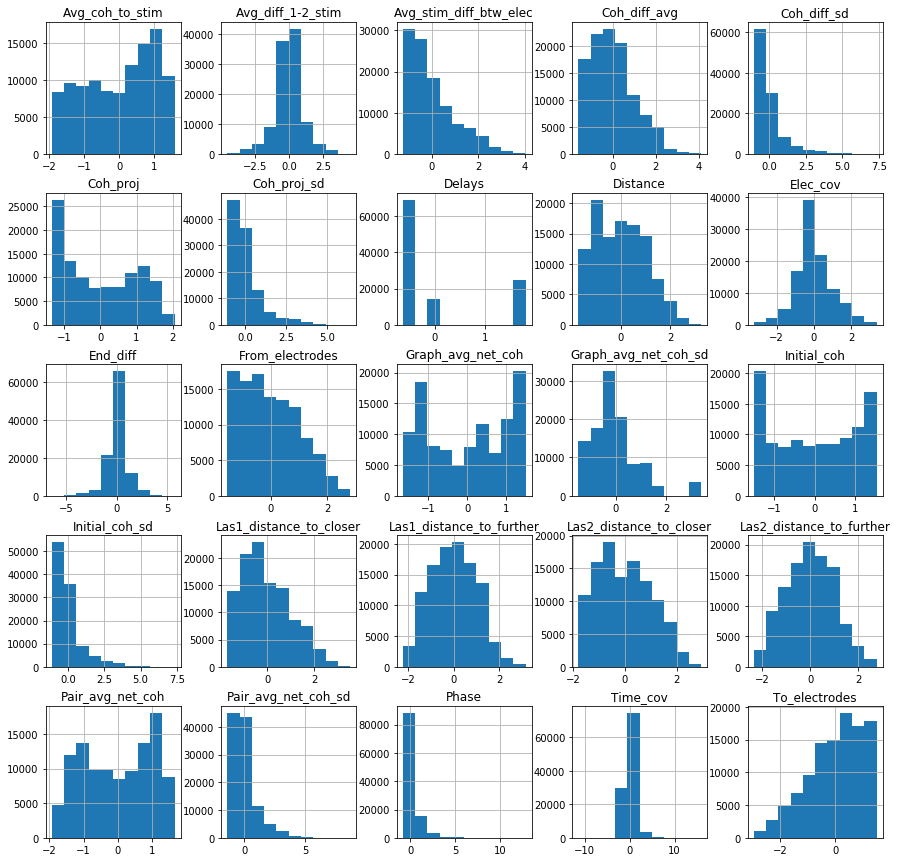

/home/julien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


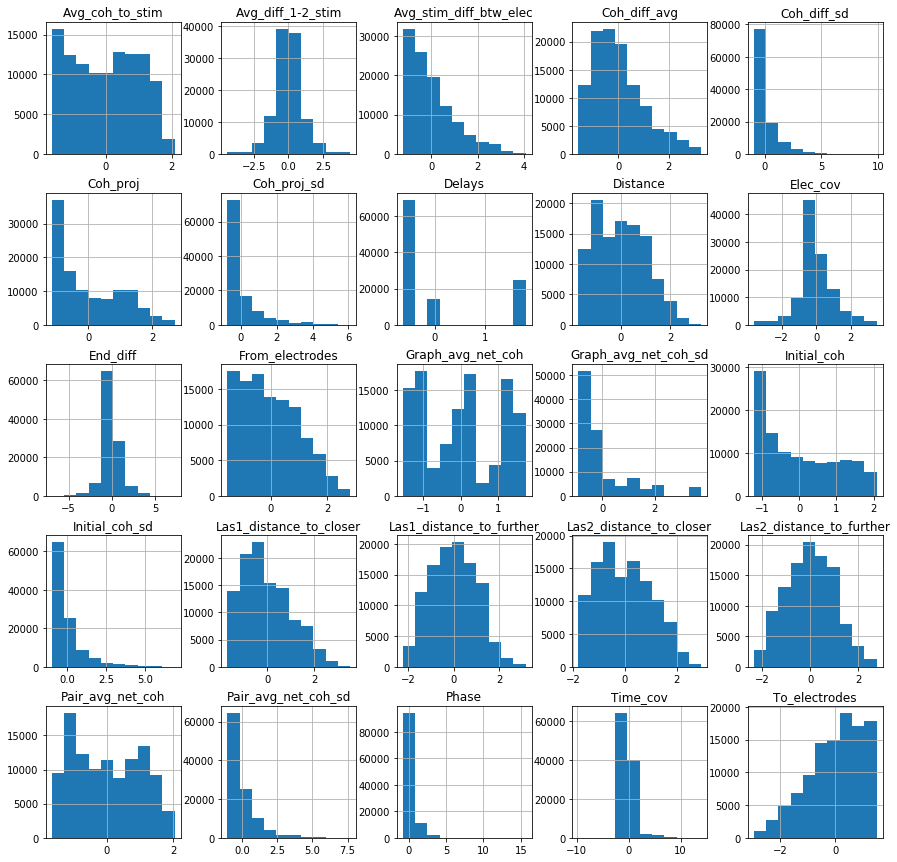

/home/julien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


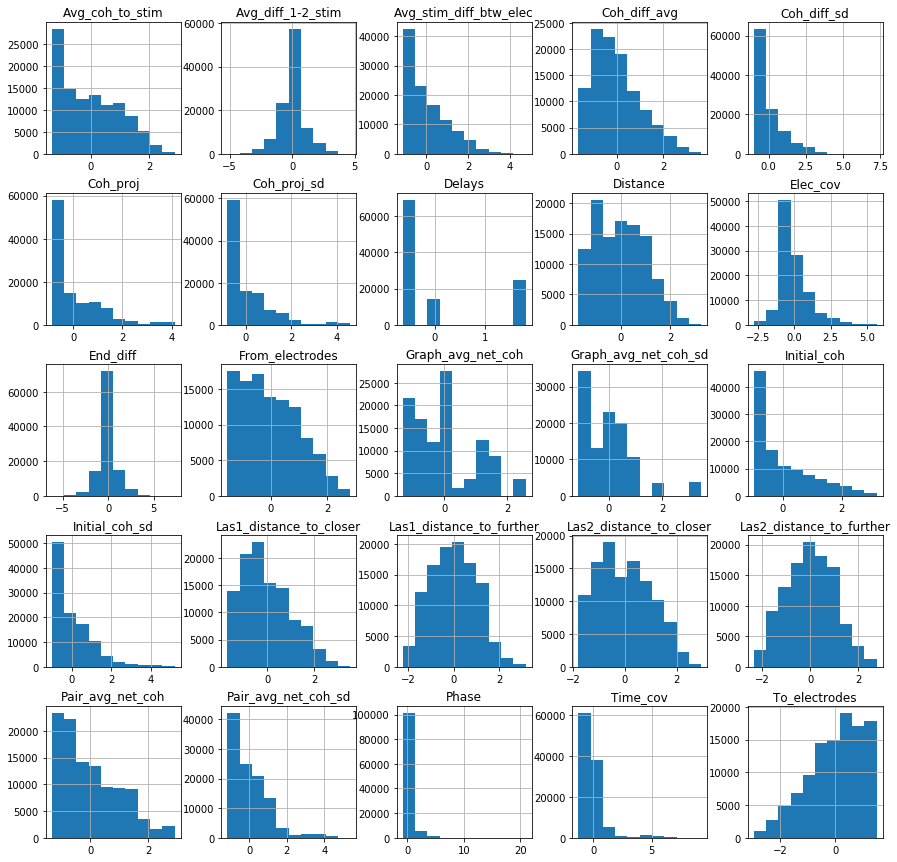

In [10]:
for band in first_data.keys():
    d = first_data[band][['Initial_coh', 'Distance', 'Coh_proj', 'Coh_proj_sd', 'Phase',
           'From_electrodes', 'To_electrodes', 'Initial_coh_sd', 'Coh_diff_sd',
           'Coh_diff_avg', 'Pair_avg_net_coh', 'Pair_avg_net_coh_sd',
           'Graph_avg_net_coh', 'Graph_avg_net_coh_sd', 'Elec_cov', 'Time_cov',
           'Avg_coh_to_stim', 'Avg_diff_1-2_stim', 'Avg_stim_diff_btw_elec',
           'End_diff', 'Delays',
           'Las1_distance_to_closer', 'Las1_distance_to_further',
           'Las2_distance_to_closer', 'Las2_distance_to_further']].values
    scaler = StandardScaler()
    d_scaled = pandas.DataFrame(scaler.fit_transform(d), columns = ['Initial_coh', 'Distance', 'Coh_proj', 'Coh_proj_sd', 'Phase',
           'From_electrodes', 'To_electrodes', 'Initial_coh_sd', 'Coh_diff_sd',
           'Coh_diff_avg', 'Pair_avg_net_coh', 'Pair_avg_net_coh_sd',
           'Graph_avg_net_coh', 'Graph_avg_net_coh_sd', 'Elec_cov', 'Time_cov',
           'Avg_coh_to_stim', 'Avg_diff_1-2_stim', 'Avg_stim_diff_btw_elec',
           'End_diff', 'Delays',
           'Las1_distance_to_closer', 'Las1_distance_to_further',
           'Las2_distance_to_closer', 'Las2_distance_to_further'])

    fig = plt.figure(figsize = (15, 15))
    ax = fig.gca()
    d_scaled.hist(ax=ax)
    plt.show()

# Exploratory wrt stim site

In [11]:
#comparison of deltas
for band in data.keys():
    print(band)
    print(stats.ttest_ind(local_data[band]["cond_diff_Y"], data[band]["cond_diff_Y"], equal_var=False))
    print(stats.ttest_ind(local_data[band]["diff_Y"], data[band]["diff_Y"], equal_var=False))
    print(stats.ttest_ind(first_local_data[band]["End_diff"], first_data[band]["End_diff"], equal_var=False))

theta
Ttest_indResult(statistic=-2.504189325507281, pvalue=0.013167051659833652)
Ttest_indResult(statistic=-0.8421740150910314, pvalue=0.40081341466865084)
Ttest_indResult(statistic=-1.0727466718484306, pvalue=0.2907204960464207)
beta
Ttest_indResult(statistic=0.7972541961577746, pvalue=0.42635920771997604)
Ttest_indResult(statistic=0.18321700439657113, pvalue=0.8548349573880484)
Ttest_indResult(statistic=0.2439780577752845, pvalue=0.8086710676344671)
gamma
Ttest_indResult(statistic=-2.2713432195711105, pvalue=0.024316047426806913)
Ttest_indResult(statistic=0.13382167722639388, pvalue=0.8936937577949777)
Ttest_indResult(statistic=0.1593127633155044, pvalue=0.8743374586571828)
high_gamma
Ttest_indResult(statistic=-0.9904628506865955, pvalue=0.32328408256386953)
Ttest_indResult(statistic=-0.14544457246990092, pvalue=0.884523388298033)
Ttest_indResult(statistic=-0.17450127096397766, pvalue=0.8624764437141117)


In [8]:
#comparison of raws
for band in data.keys():
    print(band)
    print(stats.ttest_ind(local_data[band]["Initial_coh"]+local_data[band]["cond_diff_Y"], data[band]["Initial_coh"]+data[band]["cond_diff_Y"], equal_var=False))
    print(stats.ttest_ind(local_data[band]["Initial_coh"]+local_data[band]["diff_Y"], data[band]["Initial_coh"]+data[band]["diff_Y"], equal_var=False))
    print(stats.ttest_ind(first_local_data[band]["Initial_coh"]+first_local_data[band]["End_diff"], first_data[band]["Initial_coh"]+first_data[band]["End_diff"], equal_var=False))

theta
Ttest_indResult(statistic=2.2487010454902245, pvalue=0.02574990985431393)
Ttest_indResult(statistic=2.804244524786841, pvalue=0.005600051012815785)
Ttest_indResult(statistic=1.1688361765179325, pvalue=0.25036322254192006)
beta
Ttest_indResult(statistic=3.711590262835546, pvalue=0.0002747421976446413)
Ttest_indResult(statistic=3.31227387459968, pvalue=0.0011194444596642028)
Ttest_indResult(statistic=1.4234152601558967, pvalue=0.16346316421054233)
gamma
Ttest_indResult(statistic=3.304405551809315, pvalue=0.0011494760313128136)
Ttest_indResult(statistic=3.6830606244288955, pvalue=0.0003049708978262094)
Ttest_indResult(statistic=1.5885910831367323, pvalue=0.12114091166817434)
high_gamma
Ttest_indResult(statistic=4.554767740570784, pvalue=9.669414248230231e-06)
Ttest_indResult(statistic=4.747731305954962, pvalue=4.196796219461407e-06)
Ttest_indResult(statistic=1.9679272616524532, pvalue=0.057034141995756356)


In [22]:
first_local_data[band].columns

Index(['Initial_coh', 'Distance', 'Coh_proj', 'Coh_proj_sd', 'Phase',
       'From_electrodes', 'To_electrodes', 'Initial_coh_sd', 'Coh_diff_sd',
       'Coh_diff_avg', 'Pair_avg_net_coh', 'Pair_avg_net_coh_sd',
       'Graph_avg_net_coh', 'Graph_avg_net_coh_sd', 'Elec_cov', 'Time_cov',
       'Avg_coh_to_stim', 'Avg_diff_1-2_stim', 'Avg_stim_diff_btw_elec',
       'End_diff', 'Delays', 'Monkeys', 'Block_num', 'Experiment_block_key',
       'Both_M1', 'Both_S1', 'cond_diff_Y', 'cond_diff_percent_Y', 'diff_Y',
       'diff_percent_Y', 'Is_stim_site_1', 'Is_stim_site_2',
       'Las1_distance_to_closer', 'Las1_distance_to_further',
       'Las2_distance_to_closer', 'Las2_distance_to_further',
       'Avg_diff_12_stim', 'Delays_transformed', 'abs_end_diff'],
      dtype='object')

# Stim-site only model

theta


<ipython-input-7-800b4a1e6668>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_local_data[band]['abs_end_diff'] = np.abs(first_local_data[band]['End_diff'])


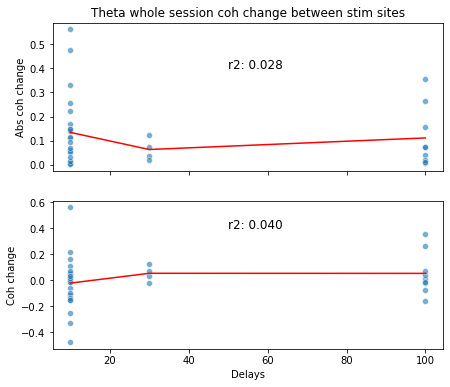

In [7]:
# Whole session changes with only delay, categorical

for band in ["theta"]:#data.keys():
    print(band)
    fig, axs = plt.subplots(2, 1, figsize=(7, 6), sharex=True)
    
    first_local_data[band]['abs_end_diff'] = np.abs(first_local_data[band]['End_diff'])
    formula_all_wholesess = "abs_end_diff ~ C(Delays)"
    
    mod1 = ols(formula=formula_all_wholesess, data=first_local_data[band])
    res1 = mod1.fit()
    
#     plt.figure(figsize=(10, 6))
    sns.scatterplot(x="Delays", y="abs_end_diff", data=first_local_data[band], ax=axs[0], alpha=.6)
    axs[0].plot([10, 30, 100], res1.predict(pandas.DataFrame({"Delays": [10, 30, 100]})), color="red")
    axs[0].set_ylabel("Abs coh change")
    axs[0].text(50, .4, "r2: "+str(res1.rsquared)[:5], fontsize=12)
#     plt.ylabel("Change in coherence over session")
#     plt.show()
    axs[0].set_title("Theta whole session coh change between stim sites")

    formula_all_wholesess = "End_diff ~ C(Delays)"
    
    mod2 = ols(formula=formula_all_wholesess, data=first_local_data[band])
    res2 = mod2.fit()
    
#     plt.figure(figsize=(10, 6))
    sns.scatterplot(x="Delays", y="End_diff", data=first_local_data[band], ax=axs[1], alpha=.6)
    axs[1].plot([10, 30, 100], res2.predict(pandas.DataFrame({"Delays": [10, 30, 100]})), color="red")
    axs[1].set_ylabel("Coh change")
    axs[1].text(50, .4, "r2: "+str(res2.rsquared)[:5], fontsize=12)

#     plt.savefig("figs/stdp_net_and_abs.pdf")
#     plt.show()
#     print(res1.rsquared)
#     print(res1.mse_total)
#     print(res1.f_pvalue)


In [35]:
os.listdir(".")

['pred_Elec_cov.pdf',
 'pred_Las1_distance_to_closer.pdf',
 'pred_Las1_distance_to_further.pdf',
 'pred_Coh_diff_avg.pdf',
 'pred_Both_S1.pdf',
 'pred_Distance.pdf',
 'processed_control_optodata_25may20.pkl',
 'pred_Block_num.pdf',
 'pred_Las2_distance_to_further.pdf',
 'figs',
 'pred_Time_cov.pdf',
 'processed_duringstim_optodata_24may20.pkl',
 'pred_Coh_proj.pdf',
 'pred_Pair_avg_net_coh.pdf',
 'pred_Delays.pdf',
 'pred_Phase.pdf',
 'processed_optodata_25may20.pkl',
 'pred_Avg_stim_diff_btw_elec.pdf',
 'processed_control_duringstim_optodata_25may20.pkl',
 'pred_Graph_avg_net_coh.pdf',
 'processed_optodata_3mar20.pkl',
 'pred_Both_M1.pdf',
 'pred_Las2_distance_to_closer.pdf',
 'pred_Initial_coh.pdf']

# Whole-network model
Replicate these analyses with nonlinear modeling

In [42]:
# All data, whole-session changes
# Only delay

for band in data.keys():
    print(band)
    formula_delay = "End_diff ~ Delays"
    mod1 = ols(formula=formula_delay, data=first_data[band])
    res1 = mod1.fit()
#     print(res1.rsquared)
#     print(res1.f_pvalue)
    
    
    formula_protocol_wholesess = "End_diff ~ Distance + Phase + Delays + Monkeys + Block_num + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further"
    mod2 = ols(formula=formula_protocol_wholesess, data=first_data[band])
    res2 = mod2.fit()
#     print(anova_lm(res1, res2))
    print(res2.summary())
#     print(res1.rsquared)
#     print(res1.mse_total)

    formula_all_wholesess = "End_diff ~ Distance + Phase + Delays + Monkeys + Block_num + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Time_cov + Coh_proj + Graph_avg_net_coh + Coh_diff_avg + Avg_stim_diff_btw_elec"
    mod3 = ols(formula=formula_all_wholesess, data=first_data[band])
    res3 = mod3.fit()
#     print(res3.summary())
#     print(anova_lm(res2, res3))

    
    print()

theta
                            OLS Regression Results                            
Dep. Variable:               End_diff   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     819.5
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:59:33   Log-Likelihood:                 28824.
No. Observations:              108598   AIC:                        -5.763e+04
Df Residuals:                  108587   BIC:                        -5.752e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept         


high_gamma
                            OLS Regression Results                            
Dep. Variable:               End_diff   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     227.6
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:59:36   Log-Likelihood:                 76270.
No. Observations:              108598   AIC:                        -1.525e+05
Df Residuals:                  108587   BIC:                        -1.524e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept   

In [31]:
# All data, whole-session changes
# Only protocol

for band in data.keys():
    print(band)
    formula_all_wholesess = "End_diff ~ Distance + Phase + Delays + Monkeys + Block_num + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further"
    mod1 = ols(formula=formula_all_wholesess, data=first_data[band])
    res1 = mod1.fit()
    print(res1.rsquared)
    print(res1.mse_total)

theta
0.07017563462680498
0.037032772421957606
beta
0.062330642623595334
0.01943324147906568
gamma
0.03499736277710841
0.014566307994704307
high_gamma
0.02053210457900423
0.014672939820521848


In [9]:
# All data, whole-session changes
# All features

for band in data.keys():
    print(band)
    formula_all_wholesess = "End_diff ~ Distance + Phase + Delays + Monkeys + Block_num + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Time_cov + Coh_proj + Graph_avg_net_coh + Coh_diff_avg + Avg_stim_diff_btw_elec"
    mod1 = ols(formula=formula_all_wholesess, data=first_data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

theta
0.32124081134880933
beta
0.16826817729130084
gamma
0.21667840894108492
high_gamma
0.2727132750340633


In [54]:
# All data, whole-session changes
# Only graph

for band in data.keys():
    print(band)
    formula_all_wholesess = "End_diff ~ Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Time_cov + Coh_proj + Graph_avg_net_coh + Coh_diff_avg + Avg_stim_diff_btw_elec"
    mod1 = ols(formula=formula_all_wholesess, data=first_data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

theta
0.14267496469806784
beta
0.10629008563909059
gamma
0.15365213158597835
high_gamma
0.21166325638363703


In [12]:
# All data, all single-block changes
# Only protocol

for band in data.keys():
    print(band)
    formula_all = "diff_Y ~ Distance + Phase + Delays + Monkeys + Block_num + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further"
    mod1 = ols(formula=formula_all, data=data[band])
    res1 = mod1.fit()
    print(res1.rsquared)
#     print(res1.f_pvalue)

theta
0.008022001881004548
beta
0.009772569713669133
gamma
0.004446373590542896
high_gamma
0.009852471409279584


In [12]:
# All data, with block interaction
# All features

for band in data.keys():
    print(band)
    formula_all_blockinteract = "cond_diff_Y ~ (Block_num + Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Coh_proj + Graph_avg_net_coh + Coh_diff_avg)"
    mod1 = ols(formula=formula_all_blockinteract, data=data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

theta
0.14640412943835468
beta
0.09398034048739023
gamma
0.1412897241794172
high_gamma
0.2511342754489351


In [13]:
# All data, with block interaction
# All features

for band in data.keys():
    print(band)
    formula_all_blockinteract = "cond_diff_Y ~ Block_num * (Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Coh_proj + Graph_avg_net_coh + Coh_diff_avg)"
    mod1 = ols(formula=formula_all_blockinteract, data=data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

theta
0.179785656633766
beta
0.1218571472943677
gamma
0.15951232191924047
high_gamma
0.2735897532206033
